In [1]:
import yaml
import os, sys
import numpy as np
import matplotlib.pyplot as plt

from scripts import *
from models.fiducial import *

plt.rcParams['font.size'] = 16

In [2]:
path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc'

In [7]:
modeldir = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/'
uv_spec = np.loadtxt(os.path.join(modeldir, 'uv_enhanced/starspec.txt'))
spec = np.loadtxt(os.path.join(modeldir, 'baseline/starspec.txt'))

Text(0, 0.5, 'flux')

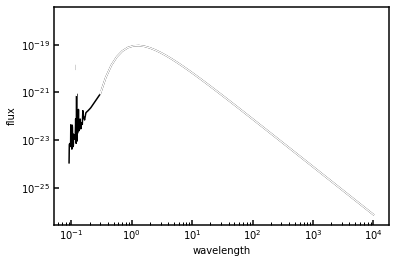

In [8]:
plt.plot(spec[0], spec[1], 'k')
plt.plot(uv_spec[0], uv_spec[1], 'w')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('wavelength');plt.ylabel('flux')

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'T_star' in keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_star' in keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:38: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_uv_star' in keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'R_star' in keys:
/Users/arcticfox/Documents/Gi

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/baseline/model_inputs.yaml
baseline
saved star spectrum
Saved radmc setup files in /Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/baseline
completed thermal mc
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat
[[[[1177.16458401 1045.08759295]]

  [[1181.52953534 1050.30924517]]

  [[1183.34225941 1051.93206516]]

  ...

  [[ 757.260198    757.27518981]]

  [[ 809.8810054   809.90065712]]

  [[ 757.43529907  757.45031114]]]


 [[[1148.61654382 1016.2569805 ]]

  [[1148.5229366  1017.14436196]]

  [[1151.03844182 1019.37874601]]

  ...

  [[ 382.14270811  382.14322063]]

  [[ 361.88469261  361.88699101]]

  [[  24.15452583   19.98814827]]]


 [[[1115.51952457  983.75661902]]

  [[1119.09391693  986.82228929]]

  [[1120.37861551  988.89439724]]

  ...

  [[ 311.00354252  311.00540825]]

  [[ 189.7860767   189.79055582]]

  [[   0.            0.     

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:41: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_under('w')
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:42: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_over(dcmap(1.0))
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:45: MatplotlibDeprecationWarning: You are modifying the state of a globa

plotted baseline summary figure


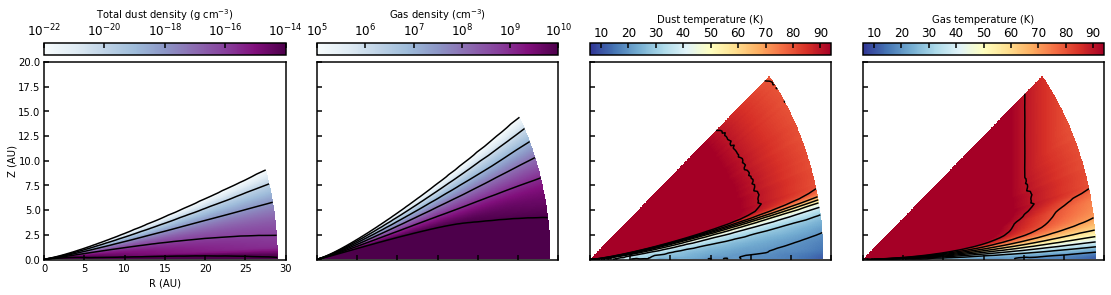

In [9]:
norm = setup(PATH=path, models=['baseline'], uv=False)

In [10]:
uv = setup(PATH=path, models=['uv_enhanced'],
           star_params={'L_uv_star':2.9e33}, uv=True)

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/uv_enhanced/model_inputs.yaml
uv_enhanced
saved star spectrum
0.05 30.0
Saved radmc setup files in /Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/uv_enhanced
completed thermal mc
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
[]


IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed